# Detección MAP y ML para función de distribución de Poisson (canal de fibra óptica)
1) Grafique en una misma figura las probabilidades condicionales P(Y|H) para H=0 y H=1 del Ejemplo 2.4 del libro. Elija parámetros para la función de densidad de Poisson y saque conclusiones

2) Genere una distribución de Poisson y realice su histograma

3) Determine las regiones de decisión MAP y ML. Para el caso MAP, proponga una distribución de probabilidad de las hipótesis

4) Estime estadísticamente la probabilidad error y realice una gráfica de probabilidad de error vs Intensidad[DB]

# Ejemplo
El siguiente caso de análisis emplea la librería de python numpy para generar variables aleatorias de poisson y la librería matplotlib para realizar distintos tipos de gráficos. Experimente con diferentes parámetros para familiarizarse con el uso de las misma. 


(array([0.05067419, 0.14864162, 0.22296243, 0.2264234 , 0.16812708,
        0.10028808, 0.05029408, 0.0210859 , 0.00782219, 0.00368103]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

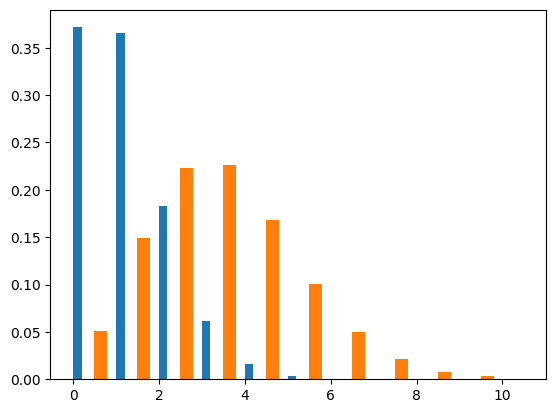

In [1]:
import numpy as np
import matplotlib.pyplot as plt
lambda0 = 1 
lambda1 = 3
nb_samples = 50000

# Analizando la estadística
signal_received_h0 =  np.random.poisson(lambda0, nb_samples)
signal_received_h1 = np.random.poisson(lambda1, nb_samples)

plt.hist(signal_received_h0,bins = 10, range = (0,10), density = True , width = 0.2, align ='mid')
plt.hist(signal_received_h1, bins = 10 , range = (0,10), density = True , width = 0.3, align ='right')


El criterio de decisión para el caso ML es para $\lambda_0$=1 y $\lambda_1$=3 $$y\gt 1 \Rightarrow \hat{H}=1 \\ y\le 1 \Rightarrow \hat{H}=0$$


A continuación se provee un simulador para este caso particular. 

In [2]:
# Simulador de hipotesis + canal + receptor
# GENERADOR DE HIPOTESIS
hypothesis = np.random.randint(0,2,nb_samples)
# SALIDA DEL CANAL 
y = [np.random.poisson(lambda1) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
# RECEPTOR 
nivel = 1
hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]

pe = sum(abs(hypothesis - np.array(hypothesis_detected)))/nb_samples
print(pe)

0.23112


Construya otro simulador parametrizado para $\lambda_o$ y $\lambda_1$. Describa en un bloque de texto como obtiene matemáticame el nivel de desición.


## Pe vs Intensidad
Sea $y$ la cantidad de fotones a la salida del foto detector. La media y varianza está dada por 
$$\mu = E\{y\}=\sum_{y=0}yp(y)=\sum_{y=0}yp(y/ho)p(ho)+\sum_{y=0}yp(y/h1)p(h1)=\lambda_o p(ho)+\lambda_1p(h1)$$
$$\sigma^2=E\{(y-\mu)^2\}=\lambda_o p(ho)+\lambda_1p(h1)$$
Si consideramos que el promedio de fotones recibido es una medida de la intensidad lumínica promedio, $\rho$, podemos graficar como varía la probabilidad de error a medida que aumneta $\rho$


1.4426950408889634
1.8204784532536746
2.4853397382384474
3.3662884287409147
4.426725648200291
6.342355813211348
[3.3296e-01 2.3094e-01 1.0522e-01 3.0280e-02 5.8400e-03 2.0000e-04]


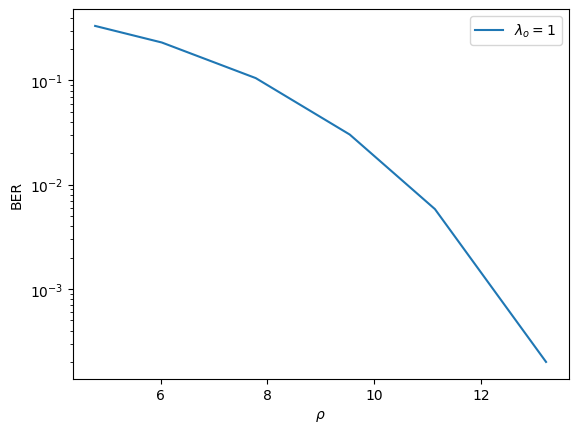

In [5]:
# Las diferentes SNR se generan variando lambda1
import numpy as np
import matplotlib.pyplot as plt

lambda1 = np.array([2, 3, 5, 8, 12, 20])
Intensidad_dB = 10*np.log10(lambda0 + lambda1)
ber = np.array([])
lambda0 = 1
for lambdaX in lambda1:
  # SALIDA DEL CANAL 
  y = [np.random.poisson(lambdaX) if hypothesis[i]>0 else np.random.poisson(lambda0) for i in range(nb_samples)]
  # RECEPTOR 
  nivel =  (lambdaX-lambda0)/np.log(lambdaX/lambda0)
  print(nivel)
  hypothesis_detected = [1 if y[i]>nivel else 0 for i in range(nb_samples)]
  ber = np.append(ber, sum(abs(np.array(hypothesis_detected) - hypothesis))/nb_samples)
print(ber)
#print(nivel)
plt.semilogy(Intensidad_dB, ber)
plt.xlabel(r'$\rho$')
plt.ylabel('BER')
plt.legend(['$\lambda_o = 1$'])

En otro bloque de código realizar curvas de desempeño similares a la anterior para distintas $\lambda_o$. El rango de valores de $\lambda_1$ puede elejirse de acuerdo a lo que desea destacar en la gráfica. Grafique las diferentes curvas en una misma figura. 

Extienda este simulador para una fuente de información no equiprobable y determine el detector ML y MAP. Compare el desempeño de la detección ML y MAP.